In [2]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
from urllib.request import Request, urlopen
import pandas as pd

import time

song = []
rank = []
year = []
artist = []


for i in range(1975,2020):
    print(i)
    
    page = Request("https://www.billboard.com/charts/year-end/" + str(i) + "/hot-100-songs",headers={'User-Agent': 'Mozilla/5.0'})

    html = urlopen(page).read()
    page_soup = soup(html,"html.parser")

    #splits the page into the 100 artists
    containers = page_soup.main.findAll("div",{"class":"ye-chart-item__primary-row"})
    
    #Sleep because if not denies too many requests
    time.sleep(2)


    #iterates through the 100 artists
    for container in containers:

        rank.append(int(container.contents[1].text.strip()))
        song.append(container.find("div",{"class":"ye-chart-item__title"}).text.strip())
        artist.append(container.find("div",{"class":"ye-chart-item__artist"}).text.strip())
        year.append(int(i))
        
data = pd.DataFrame()

data['song'] = song
data['artist'] = artist
data['rank'] = rank
data['year'] = year


data.info()
    
    





1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285 entries, 0 to 4284
Data columns (total 4 columns):
song      4285 non-null object
artist    4285 non-null object
rank      4285 non-null int64
year      4285 non-null int64
dtypes: int64(2), object(2)
memory usage: 134.0+ KB


In [13]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials


SPOTIPY_CLIENT_ID='dfc90bae743943689c070c2f0b7fd7e0'
SPOTIPY_CLIENT_SECRET='477f42668a624f6e875a5399643b8c00'

# passes in the credentials for the cleint credential flow
client_credentials_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

results = []

for index, row in data.iterrows():
    if(index % 100 == 0):
        print(index)
    results.append(sp.search(q=row.song,type='track'))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200


In [14]:
index = 0
analyses = []
for result in results:
    if(index % 100 == 0):
        print(index)
    # if the items key doesnt exist, bad data -- drop row and continue to next row
    if 'items' in result['tracks']:     
        # if the dictionary length is 0, drop row and continue
        if len(result['tracks']['items']) > 0:
            # search for audio features of current song. pull the first result 
            analysis = sp.audio_features(result['tracks']['items'][0]['id'])
            analyses.append(analysis)
        else:
            data.drop(index, inplace=True)
            continue
    else:
        data.drop(index, inplace=True)
        continue
        
    index += 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200


In [24]:
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = [] 
valence = [] 
tempo = [] 
type_feature = [] 
song_id = []
uri = []
track_href = []
analysis_url = []
duration_ms = []
time_signature = []
name = []

index = 0

for analysis in analyses:
    print(index)
    
    # the audio features method returned a none type, drop the row
    if analysis[0] is None:
        data.drop(index, inplace=True)
    else:
        name.append(row.song)
        danceability.append(analysis[0]['danceability'])
        energy.append(analysis[0]['energy'])
        key.append(analysis[0]['key'])
        loudness.append(analysis[0]['loudness'])
        mode.append(analysis[0]['mode'])
        speechiness.append(analysis[0]['speechiness'])
        acousticness.append(analysis[0]['acousticness'])
        instrumentalness.append(analysis[0]['instrumentalness'])
        liveness.append(analysis[0]['liveness'])
        valence.append(analysis[0]['valence'])
        tempo.append(analysis[0]['tempo'])
        type_feature.append(analysis[0]['type'])
        song_id.append(analysis[0]['id'])
        uri.append(analysis[0]['uri'])
        track_href.append(analysis[0]['track_href'])
        analysis_url.append(analysis[0]['analysis_url'])
        duration_ms.append(analysis[0]['duration_ms'])
        time_signature.append(analysis[0]['time_signature'])
        
    index += 1
    
data['danceability'] = danceability
data['energy'] = energy
data['key'] = key
data['loudness'] = loudness
data['mode'] = mode
data['speechiness'] = speechiness
data['acousticness'] = acousticness
data['instrumentalness'] = instrumentalness
data['liveness'] = liveness
data['valence'] = valence
data['tempo'] = tempo
data['type_feature'] = type_feature
data['song_id'] = song_id
data['uri'] = uri
data['track_href'] = track_href
data['analysis_url'] = analysis_url
data['duration_ms'] = duration_ms
data['time_signature'] = time_signature

data

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyError: '[296] not found in axis'

data

In [152]:
# data = data.loc[data['year'] < 1991, data['year'] > 2005]
for i,row in data.iterrows():
    if(row['year'] > 1990 and row['year'] < 2006):
        data = data.drop(i)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2780 entries, 0 to 4284
Data columns (total 22 columns):
song                2780 non-null object
artist              2780 non-null object
rank                2780 non-null int64
year                2780 non-null int64
danceability        2780 non-null float64
energy              2780 non-null float64
key                 2780 non-null int64
loudness            2780 non-null float64
mode                2780 non-null int64
speechiness         2780 non-null float64
acousticness        2780 non-null float64
instrumentalness    2780 non-null float64
liveness            2780 non-null float64
valence             2780 non-null float64
tempo               2780 non-null float64
type_feature        2780 non-null object
song_id             2780 non-null object
uri                 2780 non-null object
track_href          2780 non-null object
analysis_url        2780 non-null object
duration_ms         2780 non-null int64
time_signature      2780 non

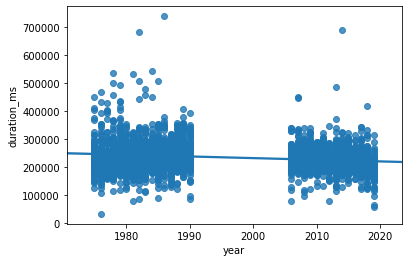

In [153]:
import seaborn as sns
sns.regplot(x=data['year'],y=data['duration_ms'])

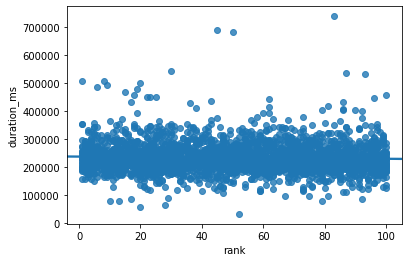

In [154]:
sns.regplot(x=data['rank'],y=data['duration_ms'])

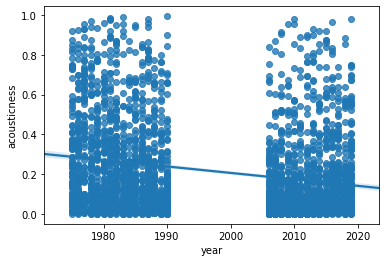

In [155]:
sns.regplot(x=data['year'],y=data['acousticness'])

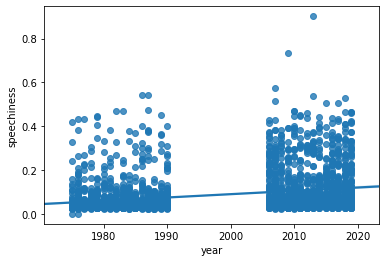

In [156]:
sns.regplot(x=data['year'],y=data['speechiness'])

In [157]:
grouped = data.groupby('year',as_index = False).mean()
grouped.head()


,year,rank,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1975,47.074074,0.594309,0.575002,5.530864,-9.244309,0.790123,0.055923,0.323954,0.031376,0.194807,0.607688,115.951136,230413.950617,3.888889
1,1976,52.906977,0.612756,0.617840,5.011628,-9.115558,0.697674,0.069030,0.276748,0.052863,0.173152,0.665294,121.412070,230012.465116,3.895349
2,1977,50.905882,0.563327,0.568682,5.247059,-9.630376,0.752941,0.057656,0.373054,0.051609,0.177619,0.551734,119.139647,234520.176471,3.894118
3,1978,50.024096,0.600542,0.576164,5.060241,-9.855133,0.722892,0.055749,0.295309,0.027351,0.158958,0.580611,116.914133,245227.301205,3.951807
4,1979,48.715909,0.616136,0.616000,5.193182,-9.521443,0.693182,0.065820,0.252262,0.022642,0.179600,0.643325,121.622023,252540.102273,3.943182


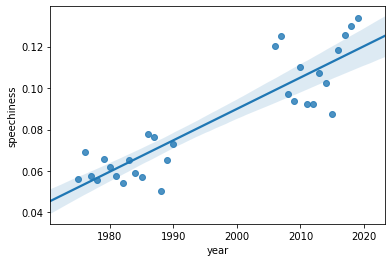

In [158]:

sns.regplot(x=grouped['year'] , y = grouped['speechiness'])

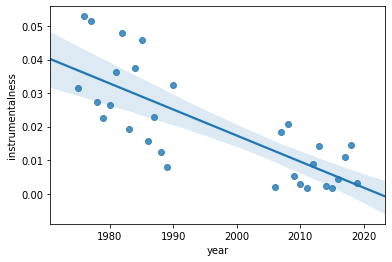

In [159]:
sns.regplot(x=grouped['year'], y= grouped['instrumentalness'])

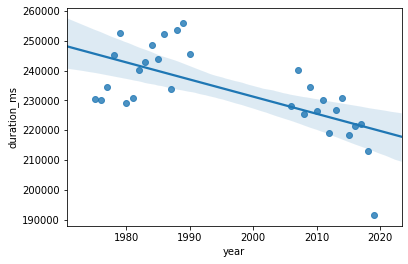

In [160]:
# The average length of a top 100 song has decreased by about 30 seconds from about 4 minutes to about 3 and a half minutes
sns.regplot(x=grouped['year'], y = grouped['duration_ms'])

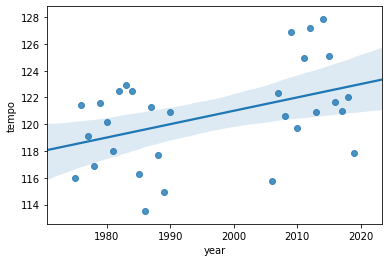

In [161]:
sns.regplot(x=grouped['year'], y = grouped['tempo'])

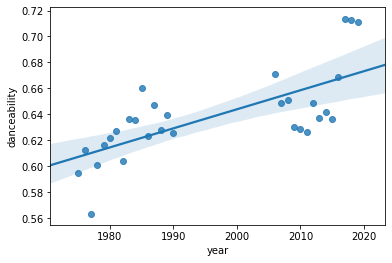

In [162]:
sns.regplot(x=grouped['year'], y = grouped['danceability'])

In [163]:
byRank = data.groupby('rank',as_index=False).mean()
byRank.head()

,rank,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,1997.888889,0.690556,0.625037,4.814815,-7.584852,0.703704,0.097370,0.233693,0.014024,0.180737,0.646889,119.376370,247452.888889,3.888889
1,2,1999.040000,0.744800,0.663760,5.160000,-6.157880,0.720000,0.067796,0.134548,0.007203,0.136252,0.672320,120.567600,234848.880000,4.000000
2,3,1997.428571,0.645107,0.658571,4.892857,-6.412714,0.785714,0.059625,0.212467,0.005145,0.202193,0.567589,118.999679,227899.392857,3.964286
3,4,1998.518519,0.693259,0.637630,4.185185,-7.581963,0.777778,0.071585,0.169983,0.005387,0.197656,0.552741,125.596741,235633.296296,3.962963
4,5,1997.000000,0.642897,0.699103,5.482759,-7.434000,0.620690,0.080703,0.155071,0.003884,0.167752,0.560931,121.960828,245871.068966,4.000000


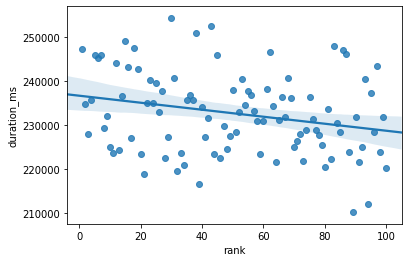

In [164]:
sns.regplot(byRank['rank'],byRank['duration_ms'])

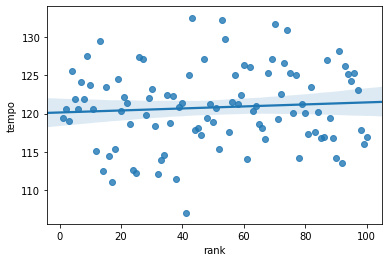

In [165]:
sns.regplot(byRank['rank'],byRank['tempo'])

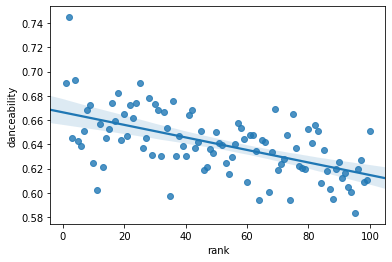

In [166]:
sns.regplot(byRank['rank'],byRank['danceability'])

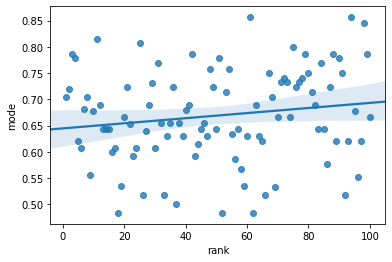

In [167]:
sns.regplot(byRank['rank'],byRank['mode'])

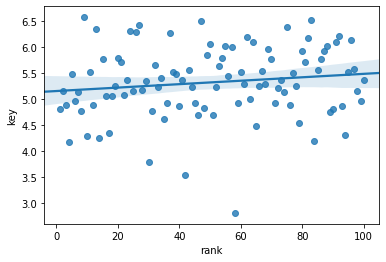

In [168]:
sns.regplot(byRank['rank'],byRank['key'])

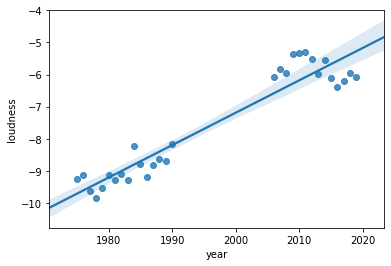

In [169]:
'''
Songs have been getting louder
https://curiosity.com/topics/why-music-is-getting-louder-curiosity/
'''

sns.regplot(grouped['year'],grouped['loudness'])

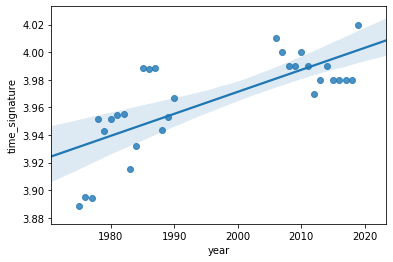

In [170]:
sns.regplot(grouped['year'],grouped['time_signature'])

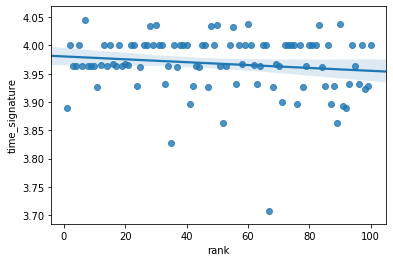

In [171]:
sns.regplot(byRank['rank'],byRank['time_signature'])

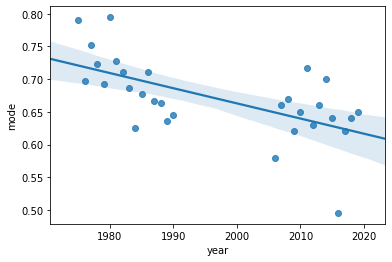

In [172]:
# Over the years a song is more likely to be minor
sns.regplot(grouped['year'],grouped['mode'])

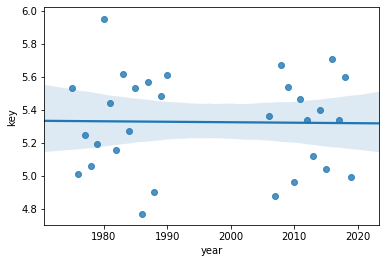

In [173]:
sns.regplot(grouped['year'],grouped['key'])

In [174]:
data.head()
data['artist'].value_counts()

Taylor Swift                         23
Rihanna                              20
Madonna                              19
Drake                                17
Elton John                           15
                                     ..
Kardinal Offishall Featuring Akon     1
Nicolette Larson                      1
Gary U.S. Bonds                       1
Steve Forbert                         1
Scandal Featuring Patty Smyth         1
Name: artist, Length: 1432, dtype: int64

In [175]:
data.loc[data['artist'] == 'Chris Brown']

,song,artist,rank,year,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type_feature,song_id,uri,track_href,analysis_url,duration_ms,time_signature
2902,Run It!,Chris Brown,16,2006,0.846,0.482,1,-6.721,0,0.1290,...,0.3930,0.212,100.969,audio_features,7xYnUQigPoIDAMPVK79NEq,spotify:track:7xYnUQigPoIDAMPVK79NEq,https://api.spotify.com/v1/tracks/7xYnUQigPoID...,https://api.spotify.com/v1/audio-analysis/7xYn...,229867,4
2930,Yo (Excuse Me Miss),Chris Brown,44,2006,0.536,0.612,4,-5.847,1,0.2720,...,0.2090,0.570,86.768,audio_features,7DFnq8FYhHMCylykf6ZCxA,spotify:track:7DFnq8FYhHMCylykf6ZCxA,https://api.spotify.com/v1/tracks/7DFnq8FYhHMC...,https://api.spotify.com/v1/audio-analysis/7DFn...,229040,4
2972,Say Goodbye,Chris Brown,86,2006,0.624,0.616,1,-6.818,0,0.0535,...,0.4340,0.297,97.006,audio_features,1aWqKElqteGfME3q8JMeIz,spotify:track:1aWqKElqteGfME3q8JMeIz,https://api.spotify.com/v1/tracks/1aWqKElqteGf...,https://api.spotify.com/v1/audio-analysis/1aWq...,227861,4
3095,With You,Chris Brown,9,2008,0.684,0.671,2,-6.424,0,0.2890,...,0.0769,0.450,179.987,audio_features,2WsuSYJNXGKXVYkHPnq2yp,spotify:track:2WsuSYJNXGKXVYkHPnq2yp,https://api.spotify.com/v1/tracks/2WsuSYJNXGKX...,https://api.spotify.com/v1/audio-analysis/2Wsu...,171253,4
3096,Forever,Chris Brown,10,2008,0.637,0.690,9,-3.214,0,0.0693,...,0.2110,0.103,140.329,audio_features,35srNkJVToAzYiZzron1FY,spotify:track:35srNkJVToAzYiZzron1FY,https://api.spotify.com/v1/tracks/35srNkJVToAz...,https://api.spotify.com/v1/audio-analysis/35sr...,253907,4
3434,Yeah 3X,Chris Brown,49,2011,0.705,0.882,11,-3.201,0,0.0445,...,0.0934,0.700,130.000,audio_features,2QtxlzvSBONjs1bDC34ixs,spotify:track:2QtxlzvSBONjs1bDC34ixs,https://api.spotify.com/v1/tracks/2QtxlzvSBONj...,https://api.spotify.com/v1/audio-analysis/2Qtx...,241667,4
3474,She Ain't You,Chris Brown,89,2011,0.634,0.716,2,-6.502,1,0.1280,...,0.0877,0.619,91.039,audio_features,3dhvQUA0NyrAea4vQ7X6Gn,spotify:track:3dhvQUA0NyrAea4vQ7X6Gn,https://api.spotify.com/v1/tracks/3dhvQUA0NyrA...,https://api.spotify.com/v1/audio-analysis/3dhv...,248107,4
3541,Don't Wake Me Up,Chris Brown,56,2012,0.602,0.691,7,-5.197,0,0.0510,...,0.1440,0.206,127.967,audio_features,18VfHIPaCo0s6FTi1Fnp6T,spotify:track:18VfHIPaCo0s6FTi1Fnp6T,https://api.spotify.com/v1/tracks/18VfHIPaCo0s...,https://api.spotify.com/v1/audio-analysis/18Vf...,222307,4
3569,Turn Up The Music,Chris Brown,84,2012,0.594,0.841,1,-5.792,1,0.1020,...,0.1560,0.643,129.925,audio_features,1RMRkCn07y2xtBip9DzwmC,spotify:track:1RMRkCn07y2xtBip9DzwmC,https://api.spotify.com/v1/tracks/1RMRkCn07y2x...,https://api.spotify.com/v1/audio-analysis/1RMR...,227973,4
3973,Back To Sleep,Chris Brown,89,2016,0.647,0.646,9,-5.483,0,0.2430,...,0.0888,0.721,92.981,audio_features,6dlpABcXrQKRU9G00i6Zba,spotify:track:6dlpABcXrQKRU9G00i6Zba,https://api.spotify.com/v1/tracks/6dlpABcXrQKR...,https://api.spotify.com/v1/audio-analysis/6dlp...,201253,4
